## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**BUSINESS UNDERSTANDING**

As a data scientist analyzing the King County housing market, my business understanding is that the real estate industry is a crucial sector that plays a significant role in the economy. The success of a real estate transaction depends on several factors, including the location, the size of the property, the condition of the property, the amenities, and the current market conditions. The housing market is subject to various external factors such as interest rates, economic conditions, and government policies that can impact the demand and supply of properties.

The dataset contains information about the houses in King County, Seattle. The dataset has 21 variables including the price, number of bedrooms, bathrooms, square footage of the living area, and other variables. The dataset contains 21,597 observations. The scope of this analysis is limited to the data provided. We will use feature engineering techniques such as imputation, normalization, and one-hot encoding to preprocess the data. We will use multiple linear regression model. We will evaluate the performance of the model using metrics such as mean squared error, mean absolute error, and R-squared.

To overcome these challenges, we need to use a combination of quantitative and qualitative analysis techniques and incorporate domain knowledge and expertise. By understanding the King County housing market's complexities and using data-driven insights, we can help real estate agents and property owners make informed decisions about pricing, marketing, and selling their properties, ultimately leading to more successful real estate transactions and a more robust housing market.

**BUSINESS PROBLEM**

A real estate agency from King County, Seattle hired us for a project to analyse how different factors affect prices of homes.The aim of this analysis is to build a multiple linear regression model that predicts the prices of houses in King County, Seattle.

By developing a model that can accurately predict the sale price of houses, real estate agents can better advise their clients on pricing strategies, investors can identify potentially undervalued properties, and homeowners can better estimate the value of their own properties. This can ultimately lead to more efficient and profitable real estate transactions in King County.

You are charged with exploring what factors most significantly affect home prices. You must then translate those findings into actionable insights that the real estate agency can use to help decide what factors to consider when advising potential home buyers.

**DATA UNDERSTANDING**

In [ ]:
Looking into

In [7]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
house_df=pd.read_csv('kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
house_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [10]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
house_df.value_counts()

id          date        price     bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
9895000040  7/3/2014    399900.0  2         1.75       1410         1005      1.5     NO          NONE  Average    9 Better   900         510.0          2011      0.0           98027    47.5446  -122.018  1440           1188          1
2768200213  7/24/2014   529000.0  2         2.50       1320         1395      2.0     NO          NONE  Average    8 Good     990         330.0          2014      0.0           98107    47.6689  -122.362  1550           1519          1
2768200210  8/25/2014   499000.0  2         2.50       1320         1157      2.0     NO          NONE  Average    8 Good     990         330.0          2014      0.0           98107    47.6689  -122.363  1550           1519          1
2768200209  10/6/2014   529950.0  2         2.50       1500  

Variables and Justification:

price: This is the dependent variable, which is the target variable we want to predict using the independent variables.

bedrooms: The number of bedrooms is a crucial feature in determining the value of a property. The more the number of bedrooms, the higher the value of the property.

bathrooms: The number of bathrooms is also an important feature in determining the value of a property. The more the number of bathrooms, the higher the value of the property.

sqft_living: The square footage of living space in the home is one of the most important features in determining the value of a property. The larger the living space, the higher the value of the property.

sqft_lot: The square footage of the lot is also an important feature in determining the value of a property. The larger the lot, the higher the value of the property.

waterfront: Whether the house is on a waterfront is an important feature in determining the value of a property. Properties with waterfront views have a higher value than properties without a waterfront view.

view: The quality of the view from the house is an important feature in determining the value of a property. Properties with a better view have a higher value than properties with a poor view.

condition: The overall condition of the house is an important feature in determining the value of a property. Properties that are well-maintained have a higher value than properties that are poorly maintained.

grade: The overall grade of the house is an important feature in determining the value of a property. Properties with a higher grade have a higher value than properties with a lower grade.

sqft_above: The square footage of the house apart from the basement is an important feature in determining the value of a property. The larger the living space apart from the basement, the higher the value of the property.

yr_built: The year when the house was built is an important feature in determining the value of a property. Older properties have a lower value than newer properties.

zipcode: The ZIP Code used by the United States Postal Service is an important feature in determining the value of a property. Properties in high-end neighborhoods have a higher value than properties in low-end neighborhoods.


In [3]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
y = house_df['price']

In [15]:
X_numeric = house_df.select_dtypes('number')
X_numeric.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [ ]:
use sqft_living for our baseline regression model

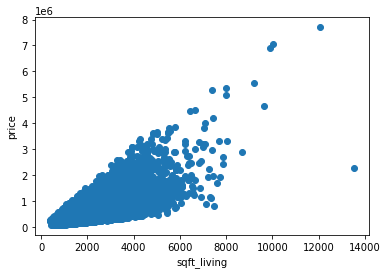

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_numeric['sqft_living'], y)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.show()

In [ ]:
# there is a linear relationship between price and sqlt_living

In [ ]:
 columns to select
    sqft_living - size
    bedrooms -  re
    year built- how age of house affects price
    year renovated 
    zipcode - areas
    floors -
    bathrooms

In [35]:
X_numeric['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [45]:
X_numeric['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
X_numeric['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [37]:
X_numeric['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [23]:
X_categorical = house_df.select_dtypes('object')
X_categorical

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,NaN,NONE,Average,8 Good,0.0


In [31]:
X_categorical['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [32]:
X_categorical['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [33]:
X_categorical['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [34]:
X_categorical['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [ ]:
y = house_df['price']
X_cat_price = pd.concat([X_categorical, y], axis=1)
X_cat_price.corr()['price'].sort_values(ascending=False)

In [ ]:
basement convert type to interger
categorical go with condition & grade & waterfront
numerical b

In [ ]:
data.groupby("make").mean().sort_values(by="mpg")[["mpg"]]